## <center>  MATH11146: Modern Optimization Methods for Big Data Problems </center>

<center> University of Edinburgh</center>

<center>Lecturer: Peter Richtarik</center>

<center>Tutors: Sona Galovicova, Filip Hanzely and Nicolas Loizou</center>

##  <center>Lab 6: Randomized Coordinate Descent with Arbitrary Sampling </center>
<center>(C) Peter Richtarik </center>
<center> 8.2.2017 </center>



## 1. Introduction

## The Problem: Ridge Regression

In this lab we will experiment with the NSync [1] algorithm applied to the <i>ridge regression</i> problem:

$$\min_{x\in \mathbb{R}^n} \left[ \; f(x) = \frac{1}{2}\|Ax-b\|_2^2 + \frac{\lambda}{2} \|x\|_2^2 \; \right],$$

where $A$ is an $m\times n$ matrix, $b\in \mathbb{R}^m$ and $\lambda>0$ is the ridge (regularization) parameter. Recall that the gradient of $f$ is given by

$$\nabla f(x) =  A^\top (Ax-b) + \lambda x.$$

## NSync Algorithm

The NSync algorithm proceeds as follows:

- Initialization: 
  - Start with $x_0\in \mathbb{R}^n$
  - Fix a proper sampling $\hat{S}$ and compute positive parameters $v = (v_1,\dots,v_n)$ such that 

$$ (f,\hat{S}) \sim ESO(v)$$

- In iteration $k$ do:
  - Draw a fresh copy of $S_k\sim \hat{S}$ (i.e., independently from everything else)
  - For $i\in S_k$ do
      $$ x^{k+1}_i = x^k_i - \frac{1}{v_i} e_i^T \nabla f(x^k) $$
  - For $i\notin S_k$ do
      $$ x^{k+1}_i = x^k_i$$

Recall that a sampling $\hat{S}$ is proper if the quantity $p_i = \mathbf{Prob}(i\in \hat{S})$ is positve for all $i\in [n]=\{1,2,\dots,n\}$.

## Computing ESO parameters 

In order to be able to run the NSync method, we need to pre-compute the ESO parameters $v_1,\dots,v_n$ before the methods starts. The following result will be helpful in this regard:

${\bf Theorem~(see~[2])}$ Let $P = (p_{ij})\in \mathbb{R}^{n\times n}$ be the <i>probability matrix</i> associated with sampling $\hat{S}$. That is,  $p_{ij} = \mathbf{Prob}(i\in \hat{S}, j\in \hat{S})$. Then $(f,\hat{S})\sim ESO(v)$ holds if $v$ satisfies the inequality

$$ P \bullet (A^\top A + \lambda I) \preceq Diag(p_1 v_1, \dots, p_n v_n),$$

where $p_i = p_{ii}$.

The inequality $C \preceq D$ means that $D-C$ is positive semidefinite. That is, it means that $x^\top (D-C)x\geq 0$ for all $x$.

We have the following useful consequence:

${\bf Corollary~1}$ If $\hat{S}$ is a serial sampling, i.e., if $p_{ij} = 0$ whenever $i\neq j$, 
then, $(f,\hat{S})\sim ESO(v)$ with 

$$v_i = \|A_{:i}\|_2^2 + \lambda, \qquad i=1,\dots,n.$$

<i>Proof:</i> Note that $P$ is diagonal, and so 

$$P \bullet (A^\top A + \lambda I) = Diag(p_1 (\|A_{:1}\|_2^2 + \lambda), \dots, p_n (\|A_{:n}\|_2^2 + \lambda)).$$

The rest follows directly by applying the theorem.


${\bf Corollary~2}$ If $\hat{S}$ is the fully parallel sampling, i.e., if $S=\{1,2,\dots,n\}$ with probability 1, then $P$ is the matrix of all ones and we have

$$P \bullet (A^TA + \lambda I) = A^\top A + \lambda I.$$

Therefore, $(f,\hat{S})\sim ESO(v)$ with 

$$v_i = \lambda_{\max}(A^\top A) + \lambda, \qquad i=1,\dots,n.$$

<i>Proof:</i> For any symmetric matrix $M \in \mathbb{R}^{n\times n}$, we have the inequality $M \preceq \lambda_{\max}(M) I$. Moreover, 

$$\lambda_{\max}(A^\top A + \lambda I) = \lambda_{\max}(A^\top A) + \lambda.$$

The rest follows by applying the theorem. 


## References

[1] Peter Richtarik and Martin Takac. On optimal probabilities in stochastic coordinate descent methods. <i>Optimization Letters</i>, 2015. [arXiv:1310.3438]

[2] Zheng Qu and Peter Richtarik. Coordinate descent with arbitrary sampling II: expected separable overapproximation. <i>arXiv:1412.8063</i>, 2014.

## 2. Generate a Random Problem

In [1]:
m = 10
n = 1000
A = sprandn(m,n,0.1)/m # sparse random matrix
b = ones(m,1)
lambda = 1

x_star = (A'*A + lambda*eye(n))\(A'*b) # finds the point x where derivative is zero (the solution)

1000×1 Array{Float64,2}:
  0.037133  
  0.00852759
  0.00896568
 -0.00520235
 -0.0770574 
 -0.0455719 
  0.0457386 
  0.0       
  0.0       
  0.0       
 -0.0760468 
 -0.0163745 
 -0.0703282 
  ⋮         
  0.0       
  0.0923112 
  0.0       
 -0.0384296 
  0.118034  
 -0.0618802 
  0.0626238 
 -0.112235  
  3.22152e-5
  0.0       
  0.056962  
  0.0349261 

## 3. The NSync Algorithm

In [2]:
function NSync(A, b, lambda, T)
    
    m, n = size(A)
    
    v = zeros(n,1)
    x = zeros(n,1)    # staring point
    g = -b            # g will be maintained to be equal to A*x - b
    
    for i=1:n         # compute ESO parameters
        v[i] = (norm(A[:,i]))^2 + lambda
    end
    
    for k = 1:T
        i = rand(1:n)                                   # choose a random index 
        h = (1/v[i]) * ( A[:,i]' * g + lambda * x[i] )  # compute the update
        x[i] = x[i] - h[1]                              # perform the update 
        g = g - h[1] * A[:,i]                           # update the residual
    end
    
    return x
    
end

NSync (generic function with 1 method)

## 4. Testing

In [5]:
print(size(A))

(10,1000)

In [4]:
n = 5
T = 20*n
x = NSync(A,b,lambda,T)
A*x
norm(x-x_star)

[0.0; 0.0; 0.0172569; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; -0.0968658; -0.0212697; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.201303; 0.0; 0.0; 0.0; 0.0; 0.0; -0.140503; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; -0.024461; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.19788; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; -0.124948; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0502763; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; -0.056764; 0.0; -0.065224; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; -0.0853125; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0303115; -0.00821409; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.275249; -0.0318113; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0

1.5431722793697453

## Problem A

Write a new version of the NSync function and call it NSyncPlot. This function will also visualize the results via a plot. Copy-paste the relevant code from a previous lab and modify to make it work.




<font color="blue">Copy the ploting method from Lab 03, and make it more generic. For example, my method (below) plots each column of y_values against x_values (a vector), and gives it the corresponding label from the labels array.</font>

In [23]:
using PyPlot

function PlotResults(x_values, y_values, labels)
    ax = axes()
    numOfPlots = length(labels)
    for i = 1:numOfPlots
        plt[:plot](x_values, y_values[:,i], "-", linewidth=3.0, label=labels[i])
    end
    legend(loc="upper right")
    ylabel("error", fontsize=20)
    xlabel("iterations")
    ax[:set_yscale]("log")
    plt[:show]
    
end

PlotResults (generic function with 1 method)

In [24]:
function NSyncPlot(A, b, lambda, T, skip, x_star, f_star)
    
    m, n = size(A)
    
    v = zeros(n,1)
    x = zeros(n,1)    # staring point
    g = -b            # g will be maintained to be equal to A*x - b
    
    for i=1:n         # compute ESO parameters
        v[i] = (norm(A[:,i]))^2 + lambda
    end
    
    # Matrices to store the data to plot
    numToPlot = floor(Int, T/skip) + 1
    xs = zeros(n,numToPlot)
    fv = zeros(numToPlot)
    
    for k = 1:T
        i = rand(1:n)                                   # choose a random index 
        h = (1/v[i]) * ( A[:,i]' * g + lambda * x[i] )  # compute the update
        x[i] = x[i] - h[1]                              # perform the update 
        g = g - h[1] * A[:,i]                           # update the residual
        if k%skip == 0
            xs[:, round(Int,k/skip)+1] = x;
            fv[round(Int,k/skip)+1] = (0.5 * (g' * g + lambda * x' * x))[1]; # functional value at x
        end
    end
    
    # Plot the errors
    y_values = zeros(numToPlot,2)
    y_values[:,1] = fv[:] - f_star; # the difference between f(x^k) and the optimal f(x^*)
    y_values[:,2] = [norm(xs[:,i] - x_star) for i=1:numToPlot] # the difference between iterates and x^*
    
    PlotResults(skip*(0:numToPlot-1), y_values, [L"f(x^{(k)}) - f(x^*)", L"||x^{(k)}-x^*||"])
    return x 
    
end

NSyncPlot (generic function with 1 method)

<font color="blue">Test it!</font>

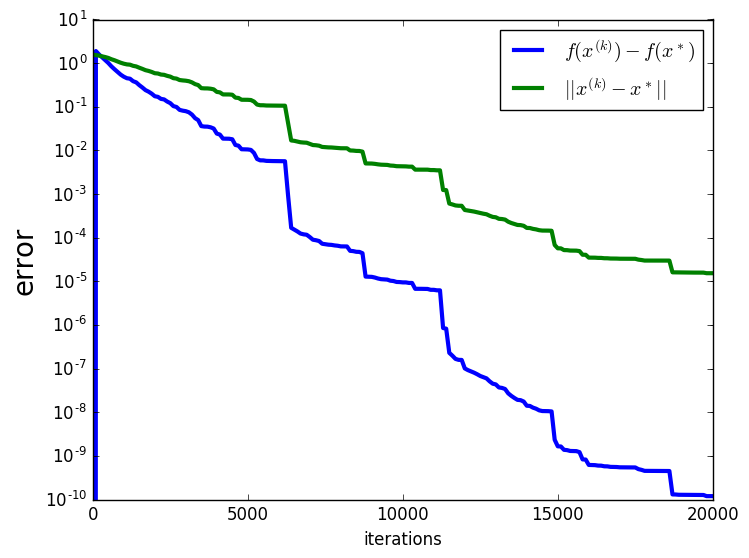

1.533898324420346e-5


In [25]:
T = 20*n
f_star = (0.5 * ((A*x_star - b)' * (A*x_star - b) + lambda * x_star' * x_star))[1]
x = NSyncPlot(A,b,lambda,T, 100, x_star, f_star)
println(norm(x - x_star))

## Problem B

Implement NSync for 2 different serial samplings and compare the results.

<font color="blue">Apart from the uniform sampling, I decided to try serial samplings with $p_i \sim ||A_{:,i}||^2$ and $p_i \sim (||A_{:,i}||^2+\lambda) = v_i$; these samplings are coded up below.

In [26]:
# Uniform sampling
function samplingUnif(A, lambda)
    p = ones(size(A,2))
    return p ./ sum(p)
end

samplingUnif (generic function with 1 method)

In [27]:
# p_i ~ ||A_{:,i}||^2
function sampling1(A, lambda)
    p = zeros(size(A,2))
    for i=1:length(p)
        p[i] = (norm(A[:,i]))^2
    end
    return p ./ sum(p)
end

sampling1 (generic function with 1 method)

In [28]:
# p_i ~ ||A_{:,i}||^2 + lambda = v_i
function sampling2(A, lambda)
    p = zeros(size(A,2))
    for i=1:length(p)
        p[i] = (norm(A[:,i]))^2 + lambda
    end
    return p ./ sum(p)
end

sampling2 (generic function with 1 method)

In [29]:
println(samplingUnif(A, lambda)[1:10])
println(sampling1(A, lambda)[1:10])
println(sampling2(A, lambda)[1:10])

[0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001]
[1.68087e-6,0.0,0.00192119,0.0,0.0,0.00205613,0.0,0.000702313,0.00179571,0.00151572]
[0.000990498,0.000990482,0.00100877,0.000990482,0.000990482,0.00101005,0.000990482,0.000997167,0.00100757,0.00100491]


<font color="blue">I also adjust the NSyncPlot method slightly, so that I can run these and plot them at the same time.</font>

In [30]:
using StatsBase

function NSyncSerial(A, b, lambda, T, skip, x_star, f_star, sampling)
    
    m, n = size(A)
    
    v = zeros(n,1)
    x = zeros(n,1)    # staring point
    g = -b            # g will be maintained to be equal to A*x - b
    
    for i=1:n         # compute ESO parameters
        v[i] = (norm(A[:,i]))^2 + lambda
    end
    
    # The probability distribution
    probs = reshape(sampling(A, lambda), (n,))
    
    # Matrices to store the data to plot
    numToPlot = floor(Int, T/skip) + 1
    xs = zeros(n,numToPlot)
    fv = zeros(numToPlot)
    
    for k = 1:T
        i = sample(1:n, WeightVec(probs))               # choose a random index 
        h = (1/v[i]) * ( A[:,i]' * g + lambda * x[i] )  # compute the update
        x[i] = x[i] - h[1]                              # perform the update 
        g = g - h[1] * A[:,i]                           # update the residual
        if k%skip == 0
            xs[:, round(Int,k/skip)+1] = x;
            fv[round(Int,k/skip)+1] = (0.5 * (g' * g + lambda * x' * x))[1]; # functional value at x
        end
    end

    return xs, fv
    
end

NSyncSerial (generic function with 1 method)

In [31]:
# Run the experiments
T = 20*n
skip = 100
xs0, fv0 = NSyncSerial(A,b,lambda,T, skip, x_star, f_star, samplingUnif);
xs1, fv1 = NSyncSerial(A,b,lambda,T, skip, x_star, f_star, sampling1);
xs2, fv2 = NSyncSerial(A,b,lambda,T, skip, x_star, f_star, sampling2);
numToPlot = length(fv0);

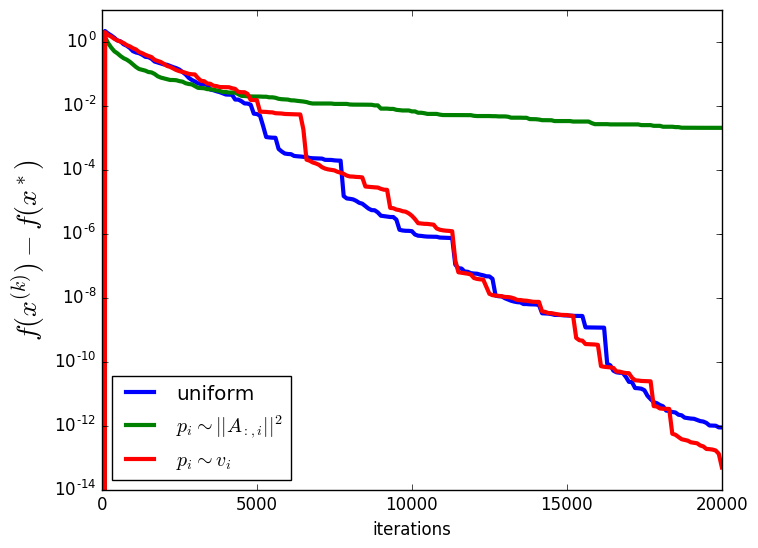

PyObject <function show at 0x31f790b90>

In [32]:
# Functional values errors
y_values = zeros(numToPlot,3)
y_values[:,1] = fv0[:] - f_star;
y_values[:,2] = fv1[:] - f_star;
y_values[:,3] = fv2[:] - f_star;
PlotResults(skip*(0:numToPlot-1), y_values, ["uniform", L"p_i \sim ||A_{:,i}||^2", L"p_i \sim v_i"])
legend(loc="lower left")
ylabel(L"f(x^{(k)}) - f(x^*)")
plt[:show]

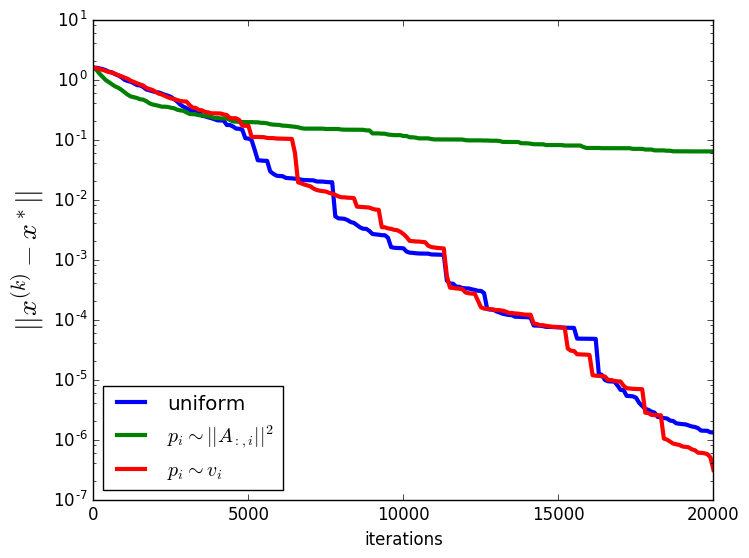

PyObject <function show at 0x31f790b90>

In [33]:
# x_k errors
y_values = zeros(numToPlot,3)
y_values[:,1] = [norm(xs0[:,i] - x_star) for i=1:numToPlot] # uniform
y_values[:,2] = [norm(xs1[:,i] - x_star) for i=1:numToPlot]
y_values[:,3] = [norm(xs2[:,i] - x_star) for i=1:numToPlot]
PlotResults(skip*(0:numToPlot-1), y_values, ["uniform", L"p_i \sim ||A_{:,i}||^2", L"p_i \sim v_i"])
legend(loc="lower left")
ylabel(L"||x^{(k)}-x^*||")
plt[:show]

## Problem C

Implement NSync with the <i>fully parallel sampling</i> given by $\hat{S}=\{1,2,\dots,n\}$ with probability 1. NSync then transforms into standard <i>gradient descent</i>. Compute the parameters $v$ satisfying the ESO assumption, and run the method for 50 iterations. Compare with NSync which uses the serial sampling and which is run for $T = 50n$ iterations. Is this comparison fair? 


In [34]:
using StatsBase

function NSyncFullyParallel(A, b, lambda, T, skip, x_star, f_star)
    
    m, n = size(A)
    
    x = zeros(n,1)    # staring point
    g = -b            # g will be maintained to be equal to A*x - b
    
    # compute ESO parameters for fully parallel
    v = ones(n,1) .* (eigs(A' * A)[1][1] + lambda)
    
    # Matrices to store the data to plot
    numToPlot = floor(Int, T/skip) + 1
    xs = zeros(n,numToPlot)
    fv = zeros(numToPlot)
    
    for k = 1:T
        for i = 1:n                                     # for all n
            h = (1/v[i]) * ( A[:,i]' * g + lambda * x[i] )  # compute the update
            x[i] = x[i] - h[1]                              # perform the update 
            g = g - h[1] * A[:,i]                           # update the residual
        end
        if k%skip == 0
            xs[:, round(Int,k/skip)+1] = x;
            fv[round(Int,k/skip)+1] = (0.5 * (g' * g + lambda * x' * x))[1]; # functional value at x
        end
    end

    return xs, fv
    
end

NSyncFullyParallel (generic function with 1 method)

In [35]:
# Run the experiments
T = 50
xs_p, fv_p = NSyncFullyParallel(A,b,lambda,T, 1, x_star, f_star);

# the serial to compare
xs_s, fv_s = NSyncSerial(A,b,lambda,T*n, skip, x_star, f_star, samplingUnif);



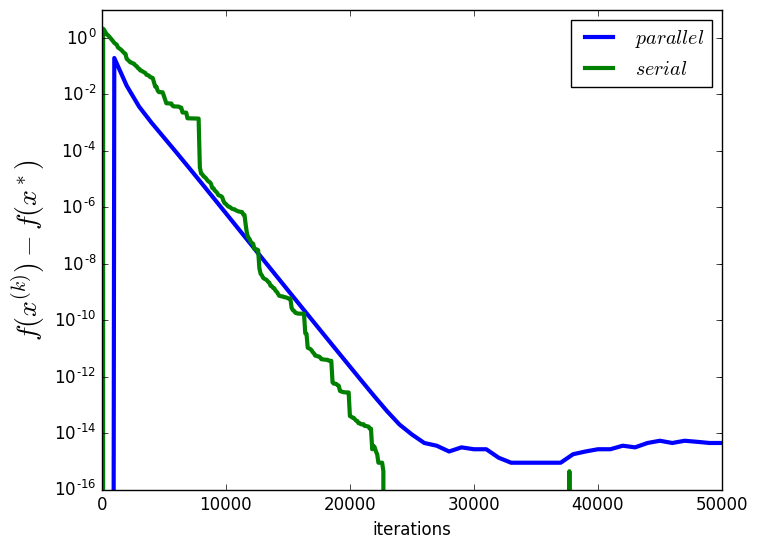

PyObject <function show at 0x31f790b90>

In [36]:
# functional values
y_values_p = zeros(T+1, 1)
y_values_p[:,1] = fv_p[:] - f_star; # the difference between f(x^k) and the optimal f(x^*)
PlotResults(n*(0:T), y_values_p, [L"parallel"])

y_values_s = zeros(length(fv_s), 1)
y_values_s[:,1] = fv_s[:] - f_star;
PlotResults(skip*(0:length(fv_s)-1), y_values_s, [L"serial"])

ylabel(L"f(x^{(k)}) - f(x^*)")
plt[:show]


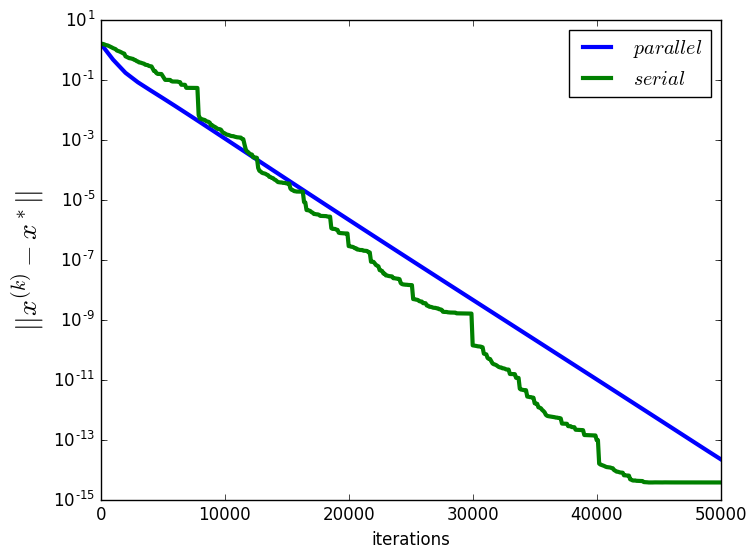

PyObject <function show at 0x31f790b90>

In [37]:
# x_k errors
y_values_p = zeros(T+1, 1)
y_values_p[:,1] = [norm(xs_p[:,i] - x_star) for i=1:T+1]; # the difference between f(x^k) and the optimal f(x^*)
PlotResults(n*(0:T), y_values_p, [L"parallel"])

y_values_s = zeros(length(fv_s), 1)
y_values_s[:,1] = [norm(xs_s[:,i] - x_star) for i=1:length(fv_s)];
PlotResults(skip*(0:length(fv_s)-1), y_values_s, [L"serial"])

ylabel(L"||x^{(k)}-x^*||")
plt[:show]


## Problem D

Implement a version of NSync for which $|\hat{S}| = 100$ with probability 1. Compare with the previously developed versions.

In [38]:
# Implementation of reservoir sampling: O(n) time, O(k) space complexity

function samplingK(k, n) 
    reservoir = collect(1:k)
    for i=(k+1):n
        pos = rand(1:i)
        if pos <= k
            reservoir[pos] = i
        end
    end
    return reservoir
end

samplingK (generic function with 1 method)

In [39]:
# Pass ESO parameters as argument
function NSyncGeneral(A, b, lambda, T, skip, x_star, f_star, sampling, v)
    
    m, n = size(A)
    
    x = zeros(n,1)    # starting point
    g = -b            # g will be maintained to be equal to A*x - b
    
    # Matrices to store the data to plot
    numToPlot = floor(Int, T/skip) + 1
    xs = zeros(n,numToPlot)
    fv = zeros(numToPlot)
    
    for k = 1:T
        is = sampling(n)
        for i=is                                     
            h = (1/v[i]) * ( A[:,i]' * g + lambda * x[i] )  # compute the update
            x[i] = x[i] - h[1]                              # perform the update 
            g = g - h[1] * A[:,i]                           # update the residual
        end
        if k%skip == 0
            xs[:, round(Int,k/skip)+1] = x;
            fv[round(Int,k/skip)+1] = (0.5 * (g' * g + lambda * x' * x))[1]; # functional value at x
        end
    end

    return xs, fv
    
end

NSyncGeneral (generic function with 1 method)

## Problem E

Write a new version of NSync (with any sampling you like), this time applied to <i>logistic regression</i> instead of ridge regression. Read about logistic regression online. 

## *Problem F

Find a way to perform the for loop in NSync in parallel. You will need to study Julia's documentation to pull this off.